# Project information

**Project title**: Exploring the world of Disney movies.

**Name:** Sirinda Palahan

**Email address associated with your DataCamp account:** sirinda111@gmail.com

**Project description**:  

Walt Disney Studios is one of the major film studios in the world. Disney has released more than 600 films since the 1930s, covering a wide range of genre. While some movies may be designed towards kids, many are intended for a broad audience. In this project, we will analyze data compiled from multiple sources to see how Disney movies have changed in popularity since its first movie release. We will also perform hypothesis testing to see what makes a movie successful.

This project assumes that you can manipulate data using Pandas library and make basic plots using Seaborn library. Moreover, you should be familiar with statistical inference to be able to perform two-sample bootstrap hypothesis tests for difference of means. We recommend that you take a look at the following courses:
1. Merging DataFrames with pandas
2. Data Visualization with Seaborn
3. Statistical Thinking in Python (Part 2) 

The dataset used in this project is a modified version of the Disney Character Success dataset available at https://data.world/kgarrett/disney-character-success-00-16  


# Project introduction


## 1. The dataset

Walt Disney Studios has been the foundation on which The Walt Disney Company was built. The Studios has produced more than 600 films since their debut film,  Snow White and the Seven Dwarfs in 1937. While many of its films were big hits, some of them were not. In this notebook, we will explore a dataset of Disney movies and analyze what contributes to the success of Disney movies.


First, we will take a look at the Disney dataset which contains three files as follows: 
* *disney_movies_total_gross.csv*: This file consists of 579 Disney movies. Features include movie title, release date, genre, MPAA rating, total gross, and inflation-adjusted gross. 
* *disney_characters.csv*: This file contains Disney animated movies and the names and genders of heroes/villains in each film. 
* *disney_director.csv*: This file includes Disney animated movies and the director name in each movie.

Let's load the files and see how the data look like.


In [1]:
# import Pandas library
import pandas as pd

# Read the files into DataFrames.
gross_df = pd.read_csv('./datasets/disney_movies_total_gross.csv', delimiter=',', encoding="utf-8", parse_dates=['release_date']) 
character_df = pd.read_csv('./datasets/disney_characters.csv', delimiter=',', encoding="utf-8", parse_dates=['release_date'] )
director_df = pd.read_csv('./datasets/disney_director.csv', delimiter=',', encoding="utf-8") 

# Let's see the first 5 rows in each DataFrame (use display() to print DataFrame as table)
display(gross_df.head())
display(character_df.head())
display(director_df.head())

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


,movie_title,release_date,hero,villian,song
0,Snow White and the Seven Dwarfs,1937-12-21,Snow White,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,1940-02-07,Pinocchio,Stromboli,When You Wish upon a Star
2,Fantasia,1940-11-13,NaN,Chernabog,NaN
3,Dumbo,1941-10-23,Dumbo,Ringmaster,Baby Mine
4,Bambi,1942-08-13,Bambi,Hunter,Love Is a Song


,name,director
0,Snow White and the Seven Dwarfs,David Hand
1,Pinocchio,Ben Sharpsteen
2,Fantasia,full credits
3,Dumbo,Ben Sharpsteen
4,Bambi,David Hand


## 2. Top 10 box-office movies

First, Let's see which are the 10 Disney movies that have earned the most at the box office.


In [2]:
#For readability, we will transform the currency of total gross from dollars to million dollars and store the result in the new column 
gross_df['total_gross_million'] = gross_df['total_gross']/1000000

# Delete the old total_gross attribute
del gross_df['total_gross']

#Then, sort data by the total gross in ascending order 
top10_gross = gross_df.sort_values(by='total_gross_million', ascending=False) 

#Finally, print the top 10  movies 
display(top10_gross.head(10))


,movie_title,release_date,genre,mpaa_rating,inflation_adjusted_gross,total_gross_million
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936.662225
524,The Avengers,2012-05-04,Action,PG-13,660081224,623.279547
578,Rogue One: A Star Wars Story,2016-12-16,Adventure,PG-13,529483936,529.483936
571,Finding Dory,2016-06-17,Adventure,PG,486295561,486.295561
558,Avengers: Age of Ultron,2015-05-01,Action,PG-13,459005868,459.005868
441,Pirates of the Caribbean: Dead Man’…,2006-07-07,Adventure,PG-13,544817142,423.315812
179,The Lion King,1994-06-15,Adventure,G,761640898,422.780140
499,Toy Story 3,2010-06-18,Adventure,G,443408255,415.004880
532,Iron Man 3,2013-05-03,Action,PG-13,424084233,408.992272
569,Captain America: Civil War,2016-05-06,Action,PG-13,408084349,408.084349


##  Movie genre popularity

From the top 10 movies above, it seems that some genres are more popular than others. So, we will check which genres are growing stronger in popularity.

genre
Action                  4184.563282
Adventure              16389.069453
Black Comedy              97.543212
Comedy                  8119.619678
Concert/Performance      103.456466
Documentary              180.685619
Drama                   4106.972970
Horror                    87.068872
Musical                 1157.284155
Romantic Comedy         1152.206855
Thriller/Suspense       1406.806519
Western                  359.011459
Name: total_gross_million, dtype: float64

,genre,year,inflation_adjusted_gross,total_gross_million
0,Action,1981,0,0.000000
1,Action,1982,77184895,26.918576
2,Action,1988,72107034,35.155392
3,Action,1990,236717544,118.499177
4,Action,1991,115837145,57.849873


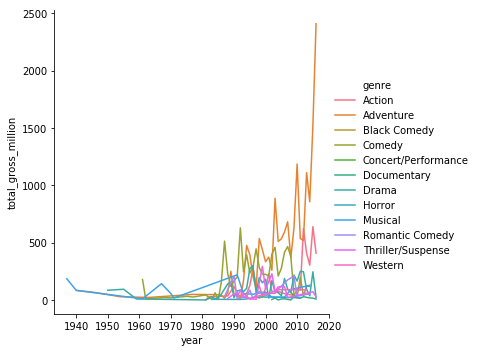

In [4]:
# We will take a quick look at a summary of the total gross by genre  
display(gross_df.groupby('genre').sum()['total_gross_million'])

# We will use a line plot to show the genre trend. So we need a year variable.
# Extract year from release_date attribute and store the result in the new column 
gross_df['year'] = [d.year for d in gross_df["release_date"]]

# Calculate sum of total gross by genre and then by year.  
group = gross_df.groupby(['genre','year']).sum()
 
# Convert the GroupBy object to a DataFrame so that we can use the DataFrame for a line plot
# We can do that by reseting the index of the GroupBy object  
# (May need to give a hint on this reset_index() function)
genre_yearly_df = group.reset_index()

# Print the first 5 rows of the DataFrame above
display(genre_yearly_df.head())

# Make a line plot using a Seaborn library 
import seaborn as sns
sns.relplot(x='year', y='total_gross_million', kind='line', hue='genre',data=genre_yearly_df)  

The line plot supports our belief that some genres are growing faster in popularity than others. For Disney movies, Adventure and Action genres are growing the fastest.